In [14]:
import json, sys, random, os, warnings
import pathlib as pl
from air_bus.airbus_utils import rle_decode, rle_encode, save_img, same_id
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd

import matplotlib.pyplot as plt


import ipywidgets
import ipyleaflet
import IPython.display
pp = pprint.PrettyPrinter(depth=4)

%matplotlib inline

In [15]:
%load_ext autoreload
%autoreload 2

In [4]:
len(os.listdir("/media/thistle/Passport/Kaggle_Data/airbus/fromkaggle/train_v2"))

192556

In [16]:
# train data located at
train_images = "/media/thistle/Passport/Kaggle_Data/airbus/fromkaggle/train_v2"
masks_data = "/media/thistle/Passport/Kaggle_Data/airbus/fromkaggle/train_ship_segmentations_v2.csv"

-- brief intro to processing the masks
<p>The data labels are unbalanced ie a vast majority of the images contain no ships. So remove all
images and masks that contain no ships.
    The masks are stored in a format, rle encoding, that contain a file of the same name for each encoded ship in an image. We will add all the individual masks with the same filename and return the single combined mask for each image. See the script file for more details.
</p>

# first deal with the masks

### run script-->  masks_download_process.py 

In [19]:
!python masks_download_process.py -h

usage: masks_download_process.py [-h] [-s SOURCE] [-t TARGET]

optional arguments:
  -h, --help            show this help message and exit
  -s SOURCE, --source SOURCE
                        the path for the file- train_ship_segmentations_v2.csv
  -t TARGET, --target TARGET
                        Set the directory where the combined masks labels will
                        be saved


## The below code is fast!
<p>processes over 190k files and then copies over 42k to a different location</p>

## Locations

#### this script copies the images and masks, if the name is included in unique files, from a root source_dir  and performs the train test split. The files are copied to a tf dataset type directory structure.

In [17]:
masks_test = "/media/thistle/Passport/Kaggle_Data/airbus/updated_data/Masks/test/masks"
masks_train = "/media/thistle/Passport/Kaggle_Data/airbus/updated_data/Masks/train/masks"
images_test = "/media/thistle/Passport/Kaggle_Data/airbus/updated_data/Images/test/images"
images_train = "/media/thistle/Passport/Kaggle_Data/airbus/updated_data/Images/train/images"

In [18]:
len(os.listdir(images_test)), len(os.listdir(images_train)), len(os.listdir(masks_train)), len(os.listdir(masks_test)), 

(4256, 38300, 38300, 4256)

In [11]:
def load_image(the_dir, str_path):
    # returns a np.array()
    path = os.path.join(the_dir, str_path)
    r = tf.io.read_file(path)
    i = tf.io.decode_jpeg(r)
    return i.numpy()

In [19]:
test_names = os.listdir(images_test)
train_names = os.listdir(images_train)

In [53]:
a_file = train_names[0]


'000155de5.jpg'

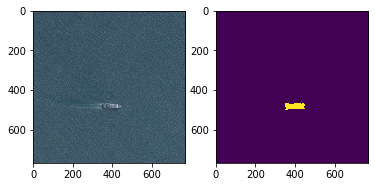

In [65]:
f,a = plt.subplots(1,2)
ip = load_image(images_train, a_file)
mp = load_image(masks_train, a_file)
a[0].imshow(ip)
a[1].imshow(np.squeeze(mp))

In [1]:
# on validation sets

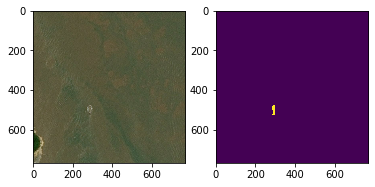

In [12]:
a_file = test_names[254]
f,a = plt.subplots(1,2)
ip = load_image(images_test, a_file)
mp = load_image(masks_test, a_file)
a[0].imshow(ip)
a[1].imshow(np.squeeze(mp))

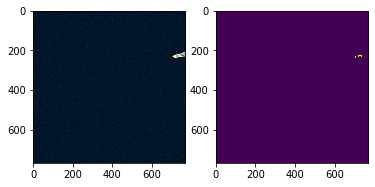

In [13]:
a_file = test_names[954]
f,a = plt.subplots(1,2)
ip = load_image(images_test, a_file)
mp = load_image(masks_test, a_file)
a[0].imshow(ip)
a[1].imshow(np.squeeze(mp))

In [20]:
# my directory structure
!tree -dn /media/thistle/Passport/Kaggle_Data/airbus/updated_data

/media/thistle/Passport/Kaggle_Data/airbus/updated_data
├── Images
│   ├── test
│   │   └── images
│   └── train
│       └── images
└── Masks
    ├── test
    │   └── masks
    └── train
        └── masks

10 directories


In [ ]:
# move on to the ImageDataGenerator notebook and dice loss notebook